In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
Train=pd.read_csv('train_bf.csv')

In [4]:
print(Train.shape)


(550068, 12)


In [5]:
Train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
Train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
User_ID = Train['User_ID']
Product_ID = Train['Product_ID']

In [8]:
train=Train.drop(['User_ID','Product_ID'],axis=1)


In [9]:
print(train.shape)


(550068, 10)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [11]:
train.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
train.fillna(0,inplace=True)

In [13]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


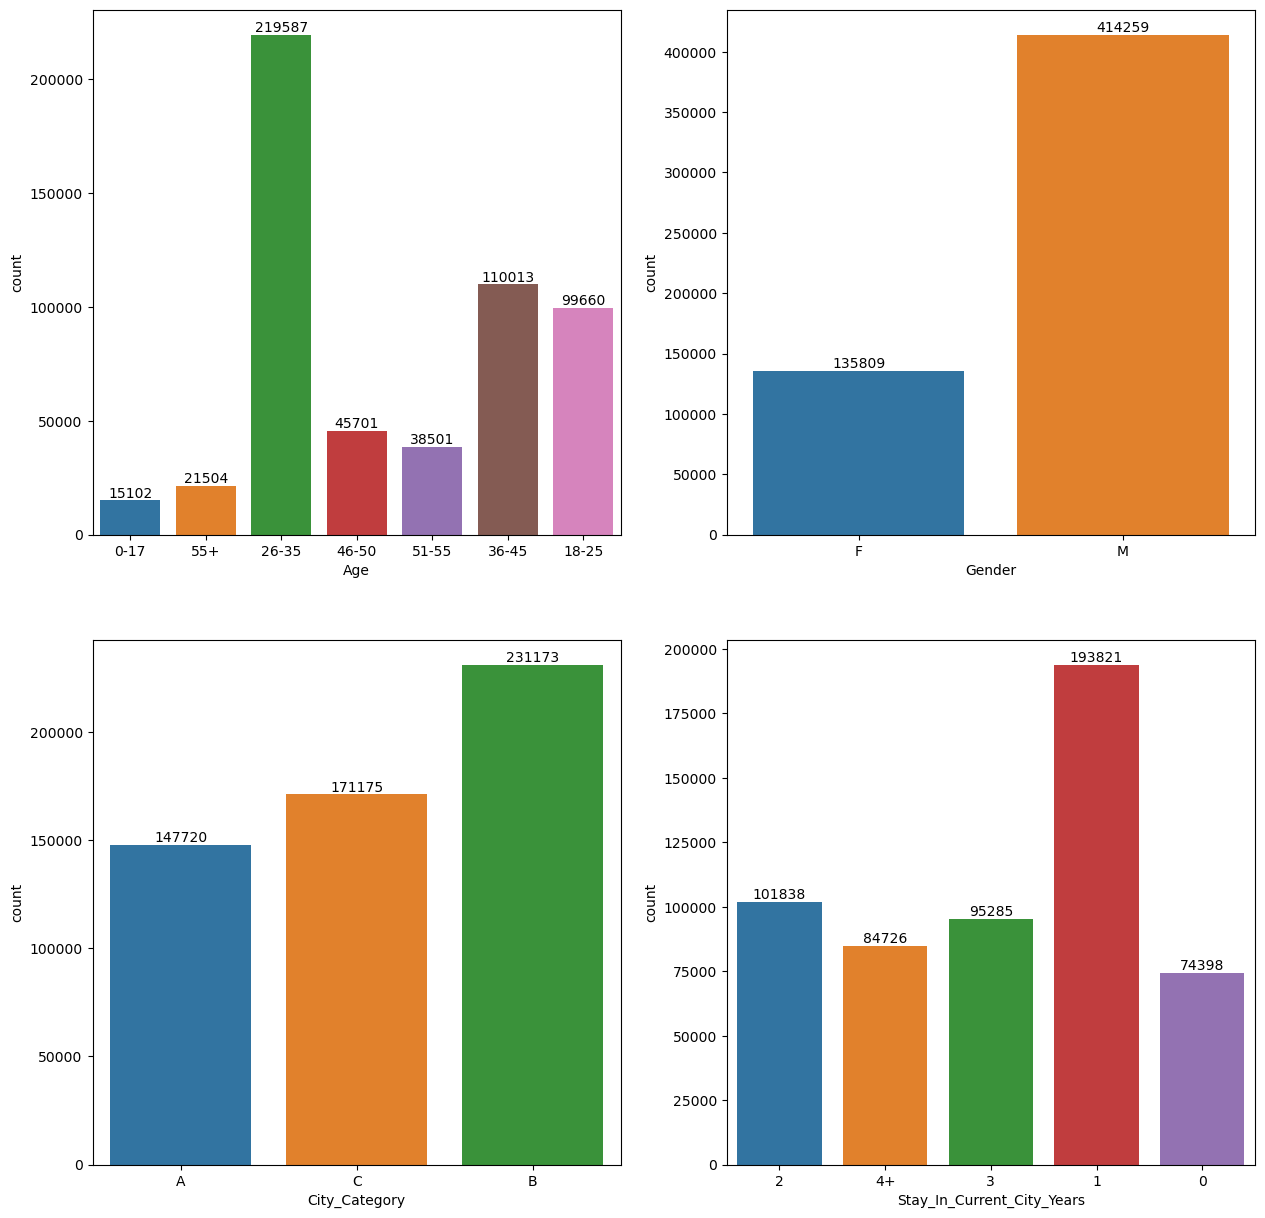

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
a=sns.countplot(x=train['Age'])
for bars in a.containers:
    a.bar_label(bars)

plt.subplot(2,2,2)
b=sns.countplot(x=train['Gender'])
for bars in b.containers:
    b.bar_label(bars)

plt.subplot(2,2,3)
c=sns.countplot(x=train['City_Category'])
for bars in c.containers:
    c.bar_label(bars)

plt.subplot(2,2,4)
d=sns.countplot(x=train['Stay_In_Current_City_Years'])
for bars in d.containers:
    d.bar_label(bars)

plt.show()

In [16]:
gender_occupation=pd.crosstab(train['Gender'],train['Occupation'],values=train['Purchase'],aggfunc='sum', margins=True, margins_name='Total')
gender_occupation

Occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Total
Gender,,,,,,,,,,,,,,,,,,,,,,
F,159883833,152806726,72569470,71707639,152264321,19595050,74079792,91177610,3379484,50206487,32803589,13636200,31762002,12827008,58010060,22453799,36820127,37496159,2317160,17007150,73428976,1186232642
M,475523125,271807418,165459113,90294529,513980163,94054709,114336992,466193977,11357904,4133559,83040876,93115418,273687444,59092473,201444632,96506412,201526828,355785294,58404301,56693467,223141466,3909580100
Total,635406958,424614144,238028583,162002168,666244484,113649759,188416784,557371587,14737388,54340046,115844465,106751618,305449446,71919481,259454692,118960211,238346955,393281453,60721461,73700617,296570442,5095812742


In [17]:
age_gender=pd.crosstab(train['Age'],train['Gender'],values=train['Purchase'],aggfunc='sum', margins=True, margins_name='Total')

In [18]:
age_gender.sort_values(by='Total', axis=0, ascending=False)

Gender,F,M,Total
Age,,,
Total,1186232642,3909580100,5095812742
26-35,442976233,1588794345,2031770578
36-45,243438963,783130921,1026569884
18-25,205475842,708372833,913848675
46-50,116706864,304136539,420843403
51-55,89465997,277633647,367099644
55+,45782765,154984610,200767375
0-17,42385978,92527205,134913183


In [19]:
gender_yr_city=pd.crosstab(train['Stay_In_Current_City_Years'],train['Gender'],values=train['Purchase'],aggfunc='mean',margins=True, margins_name='Total')

In [20]:
gender_yr_city.sort_values(by='Total',axis=0, ascending=False).round()

Gender,F,M,Total
Stay_In_Current_City_Years,,,
2,8741.0,9502.0,9320.0
3,8695.0,9492.0,9287.0
4+,8785.0,9414.0,9276.0
Total,8735.0,9438.0,9264.0
1,8775.0,9421.0,9250.0
0,8606.0,9351.0,9180.0


In [21]:
cityCategory_yr_city=pd.crosstab(train['Stay_In_Current_City_Years'],train['City_Category'],values=train['Purchase'],aggfunc='mean',margins=True, margins_name='Total')

In [22]:
cityCategory_yr_city.sort_values(by='Total',axis= 0 , ascending=False).round()

City_Category,A,B,C,Total
Stay_In_Current_City_Years,,,,
2,8970.0,9193.0,9770.0,9320.0
3,8915.0,9190.0,9768.0,9287.0
4+,8830.0,9193.0,9737.0,9276.0
Total,8912.0,9151.0,9720.0,9264.0
1,8879.0,9179.0,9647.0,9250.0
0,8987.0,8903.0,9767.0,9180.0


In [23]:
cityCategory_age=pd.crosstab(train['Age'],train['City_Category'],values=train['Purchase'],aggfunc='mean',margins=True, margins_name='Total')

In [24]:
cityCategory_age.sort_values(by='Total' , axis = 0 ,ascending=False).round()

City_Category,A,B,C,Total
Age,,,,
51-55,9509.0,9341.0,9780.0,9535.0
55+,8486.0,9804.0,9385.0,9336.0
36-45,8990.0,9108.0,9882.0,9331.0
Total,8912.0,9151.0,9720.0,9264.0
26-35,8953.0,9149.0,9835.0,9253.0
46-50,8349.0,9248.0,9533.0,9209.0
18-25,8834.0,9032.0,9697.0,9170.0
0-17,8615.0,8917.0,9060.0,8933.0


In [25]:
cityCategory_age_=pd.crosstab(train['Age'],train['City_Category'],values=train['Product_Category_1'],aggfunc='sum',margins=True, margins_name='Total')

In [26]:
cityCategory_age_.sort_values(by='Total' , axis = 0 ,ascending=False)

City_Category,A,B,C,Total
Age,,,,
Total,813387,1242828,916501,2972716
26-35,404300,484599,278046,1166945
36-45,149530,260241,194667,604438
18-25,144006,221359,144006,509371
46-50,45525,114155,102744,262424
51-55,34959,103784,83570,222313
55+,21591,31303,77556,130450
0-17,13476,27387,35912,76775


In [27]:
cityCategory_age_.columns

Index(['A', 'B', 'C', 'Total'], dtype='object', name='City_Category')

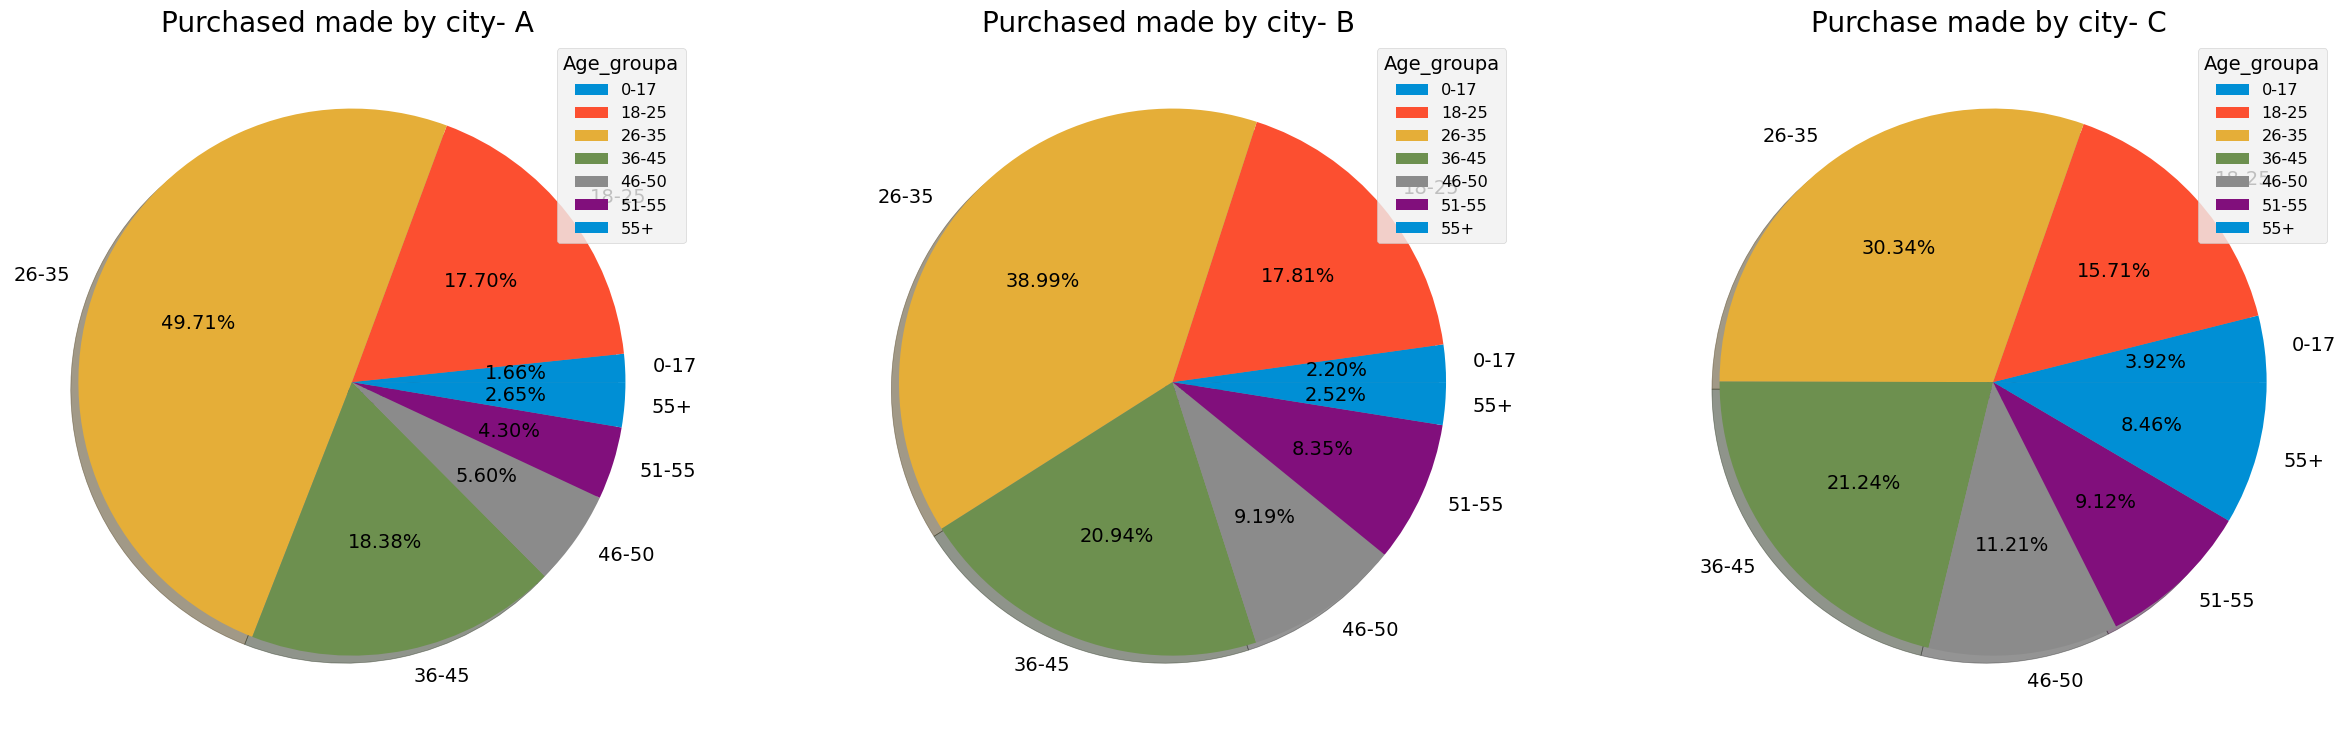

In [28]:
plt.figure(figsize=(30,15))
plt.style.use('fivethirtyeight')

plt.subplot(131)

removed_1=cityCategory_age_['A'][cityCategory_age_['A'].index != 'Total']
plt.pie(removed_1,labels=removed_1.index,shadow = True,  autopct = '%.2f%%')
labels=removed_1.index
plt.title('Purchased made by city- A ')
plt.legend(labels, title='Age_groupa', loc='upper right',fontsize='small')

plt.subplot(132)
removed_b=cityCategory_age_['B'][cityCategory_age_['B'].index != 'Total']
plt.pie(removed_b,labels=removed_b.index,shadow = True,  autopct = '%.2f%%')
labels=removed_b.index
plt.title('Purchased made by city- B ')
plt.legend(labels, title='Age_groupa', loc='upper right',fontsize='small')


plt.subplot(133)
removed_c=cityCategory_age_['C'][cityCategory_age_['C'].index != 'Total']
plt.pie(removed_c,labels=removed_c.index,shadow = True,  autopct = '%.2f%%')
labels=removed_b.index
plt.title('Purchase made by city- C ')
plt.legend(labels, title='Age_groupa', loc='upper right',fontsize='small')


plt.show()


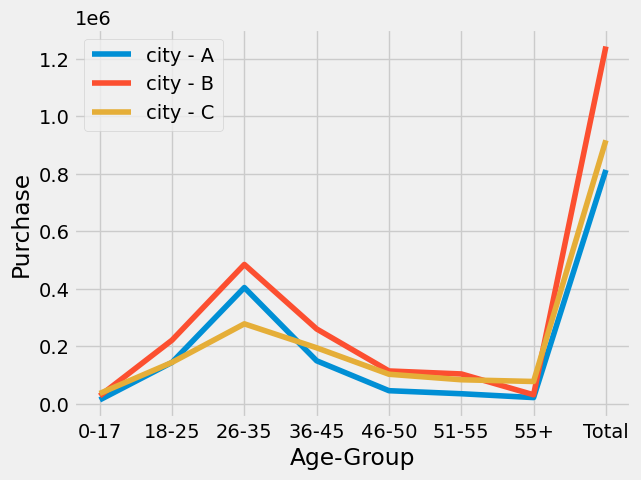

In [29]:
plt.plot(cityCategory_age_['A'],label='city - A')
plt.plot(cityCategory_age_['B'],label='city - B')
plt.plot(cityCategory_age_['C'],label='city - C')
plt.xlabel('Age-Group')
plt.ylabel('Purchase')
plt.legend()
plt.show()

In [30]:
g_o=pd.crosstab(train['Occupation'],train['Gender'],values=train['Purchase'],aggfunc='sum',margins=True, margins_name='Total')
g_o

Gender,F,M,Total
Occupation,,,
0,159883833,475523125,635406958
1,152806726,271807418,424614144
2,72569470,165459113,238028583
3,71707639,90294529,162002168
4,152264321,513980163,666244484
5,19595050,94054709,113649759
6,74079792,114336992,188416784
7,91177610,466193977,557371587
8,3379484,11357904,14737388


In [31]:
print(train['Purchase'].sum())

5095812742


In [32]:
print(train['Gender'].value_counts())
print('*-'*15)
print(train['Marital_Status'].value_counts())

Gender
M    414259
F    135809
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


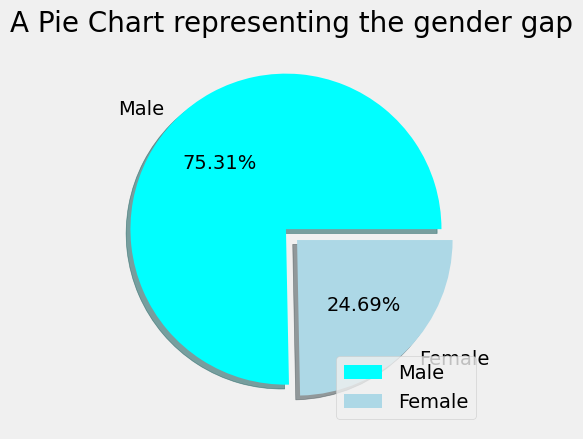

In [33]:

labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0.05, 0.05]

plt.pie(train['Gender'].value_counts(),labels=labels,colors=colors,shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()




[]

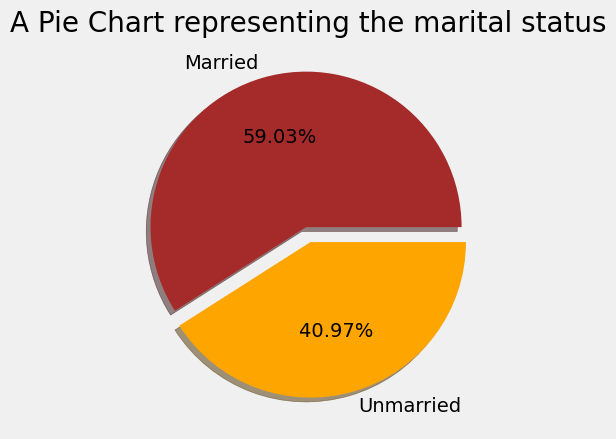

In [34]:
colors = ['brown', 'orange']
explode = [0.05, 0.05]
labels=['Married','Unmarried']
plt.pie(train['Marital_Status'].value_counts(),colors=colors,explode = explode,shadow=True,labels=labels, autopct = '%.2f%%')
plt.title('A Pie Chart representing the marital status', fontsize = 20)
plt.plot()

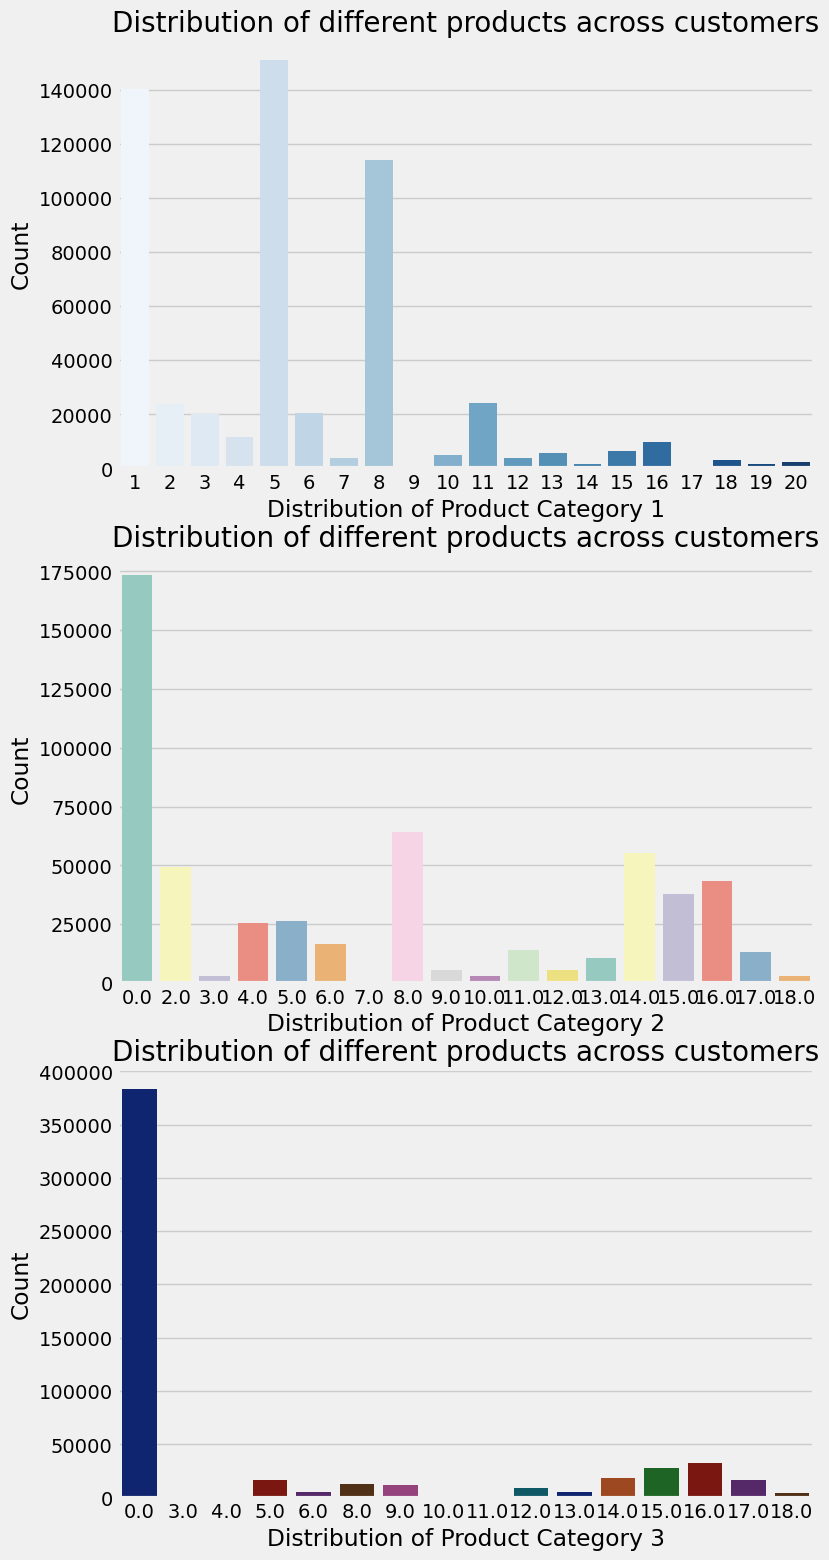

In [35]:
#sns.countplot(x=product['Product_Category_1'])

plt.figure(figsize=(8,18))

plt.subplot(311)
sns.countplot(x=train['Product_Category_1'],palette = 'Blues')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')


plt.subplot(312)
sns.countplot(x=train['Product_Category_2'],palette = 'Set3')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(313)
sns.countplot(x=train['Product_Category_3'],palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()


In [36]:
train[['Occupation', 'Purchase']].groupby('Occupation').sum().sort_values(by='Purchase')

,Purchase
Occupation,
8,14737388
9,54340046
18,60721461
13,71919481
19,73700617
11,106751618
5,113649759
10,115844465
15,118960211


In [37]:
pd.crosstab(train['Gender'],train['Purchase'].mean())

col_0,9263.968713
Gender,
F,135809
M,414259


([<matplotlib.patches.Wedge at 0x12331d23f90>,
 [Text(0.8210663846591232, 0.8052018330721789, 'F'),
  Text(-0.8210664600475562, -0.8052017561983922, 'M')],
 [Text(0.4640810000247217, 0.4551140795625359, '24.69%'),
  Text(-0.46408104263557515, -0.45511403611213463, '75.31%')])

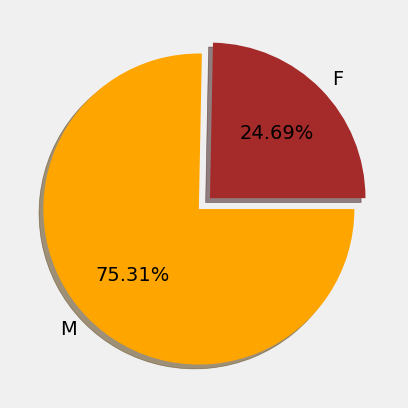

In [38]:
size=[135809,414259]
colors = ['brown', 'orange']
explode = [0.05, 0.05]
labels=['F','M']

plt.pie(size,labels=labels,colors=colors,shadow = True, explode = explode, autopct = '%.2f%%')

In [39]:
pd.crosstab(train['Occupation'], train['Gender'])

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


In [40]:
pd.crosstab(train['City_Category']=='c',train['Gender'])

Gender,F,M
City_Category,,
False,135809,414259


In [41]:
occupation=train[['Occupation', 'Purchase']].groupby('Occupation').mean().sort_values(by='Purchase')
occupation

,Purchase
Occupation,
9,8637.743761
19,8710.627231
20,8836.494905
2,8952.481683
1,8953.193270
10,8959.355375
0,9124.428588
18,9169.655844
3,9178.593088


In [42]:
# checking the dependency of product 1 on purchasing power

train[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean().sort_values(by='Purchase')

,Purchase
Product_Category_1,
19,37.041797
20,370.481176
13,722.400613
12,1350.859894
4,2329.659491
18,2972.864320
11,4685.268456
5,6240.088178
8,7498.958078


In [43]:
# checking the dependency of product 2 on purchasing power

train[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean().sort_values(by='Purchase')

,Purchase
Product_Category_2,
7.0,6884.683706
12.0,6975.472504
14.0,7105.264916
9.0,7277.006851
0.0,7518.695389
11.0,8940.580515
5.0,9027.821574
18.0,9352.440433
17.0,9421.576577


In [44]:
# checking the dependency of product 3 on purchasing power

train[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean().sort_values(by='Purchase')

,Purchase
Product_Category_3,
0.0,8221.836943
12.0,8715.512762
4.0,9794.386667
14.0,10052.594530
9.0,10431.697210
18.0,10993.980773
17.0,11769.943001
16.0,11981.890642
11.0,12091.437673


<Axes: xlabel='Product_ID'>

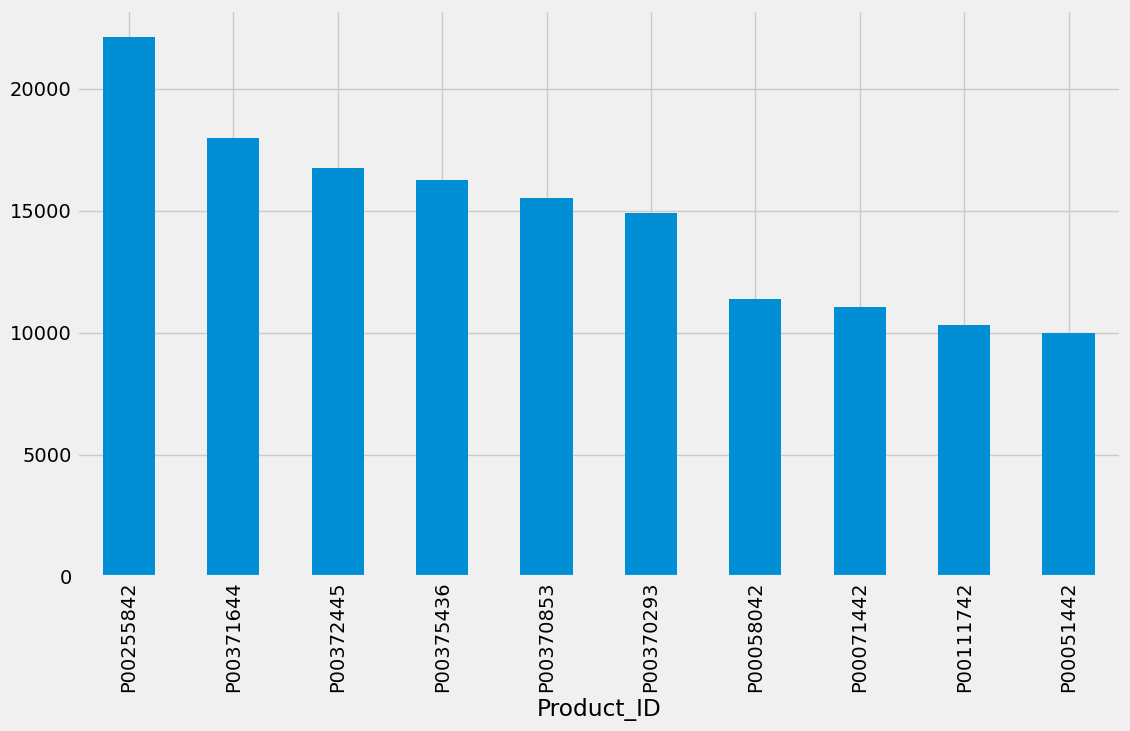

In [45]:
fig1, ax1 = plt.subplots(figsize=(12,7))
Train.groupby('Product_ID')['Product_Category_1'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

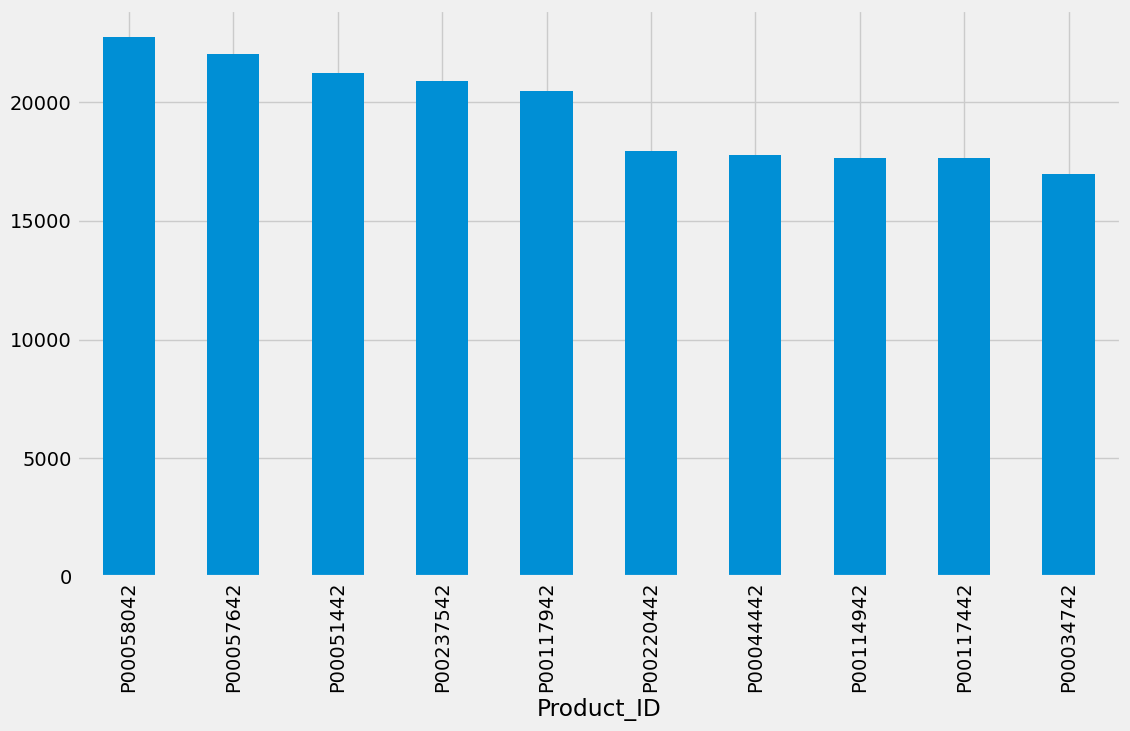

In [46]:
fig2, ax2 = plt.subplots(figsize=(12,7))
Train.groupby('Product_ID')['Product_Category_2'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

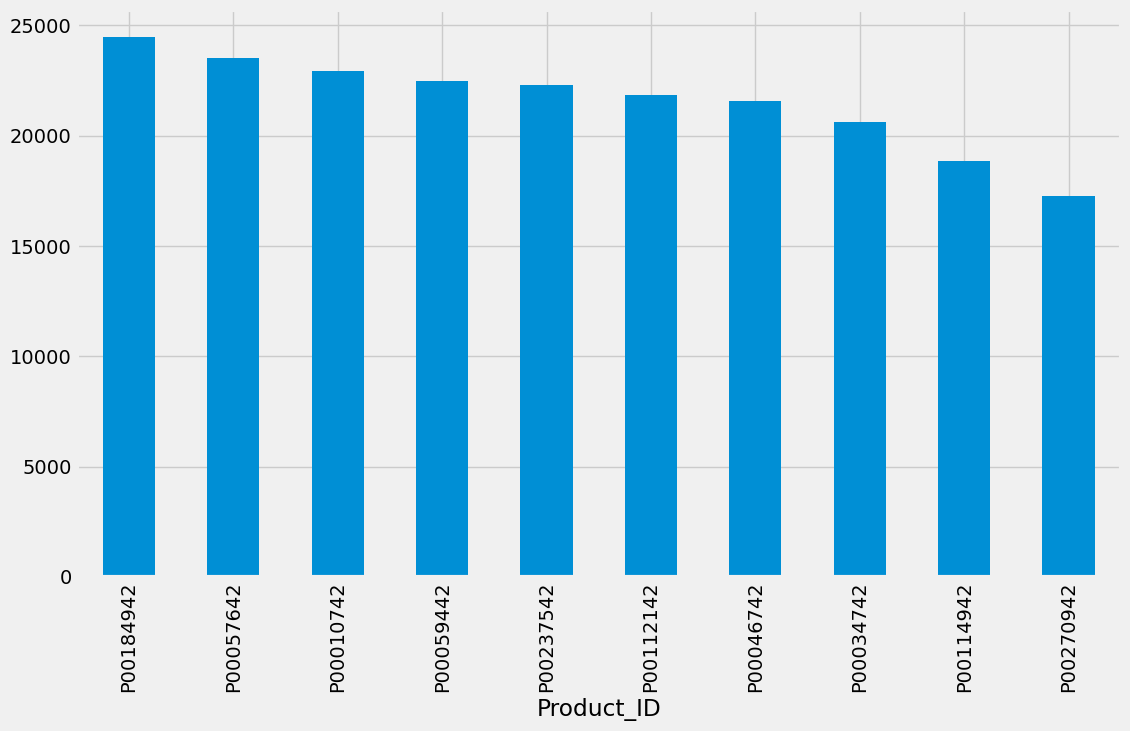

In [47]:
fig3, ax3 = plt.subplots(figsize=(12,7))
Train.groupby('Product_ID')['Product_Category_3'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

C:\Users\bokke\AppData\Local\Temp\ipykernel_6180\397720582.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Purchase'], color = 'purple', fit = norm)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


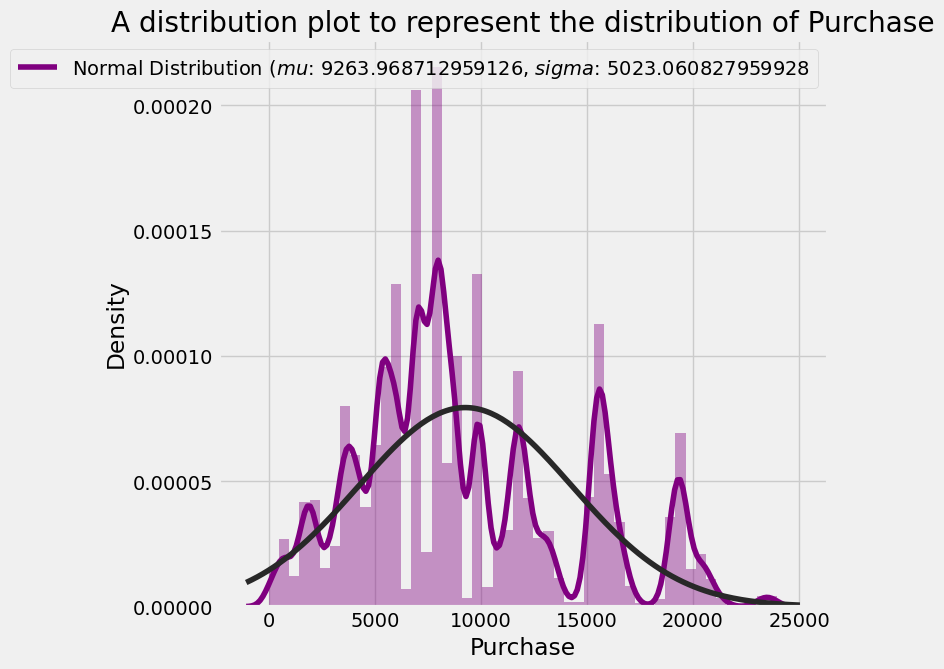

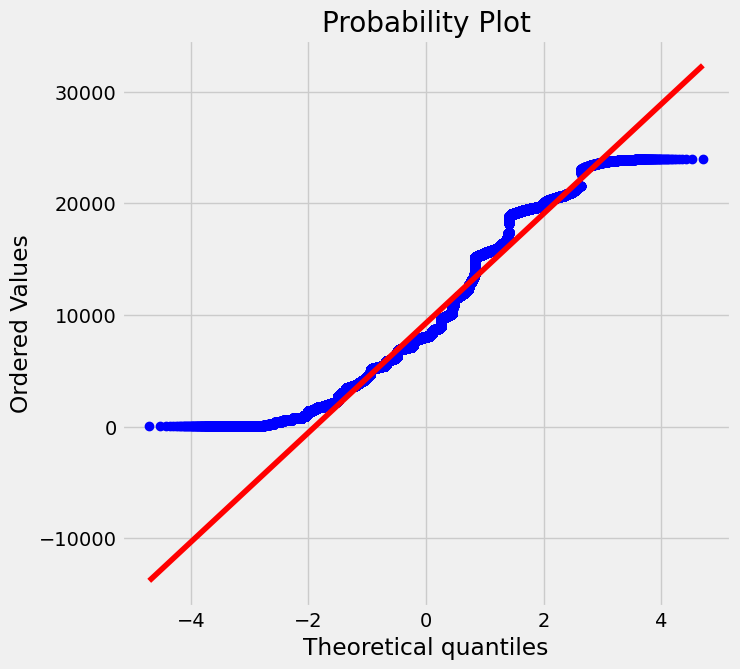

In [48]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable

plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(train['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot

stats.probplot(train['Purchase'], plot = plt)
plt.show()

In [49]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [50]:
# filling the missing values

train['Product_Category_2'].fillna(0, inplace = True)
train['Product_Category_3'].fillna(0, inplace = True)

train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [51]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
numeric=train.select_dtypes(include=['number']).columns
numeric

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [54]:
num=train[numeric]
num.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,0.0,0.0,8370
1,10,0,1,6.0,14.0,15200
2,10,0,12,0.0,0.0,1422
3,10,0,12,14.0,0.0,1057
4,16,0,8,0.0,0.0,7969


In [55]:
catagorical=train.select_dtypes(exclude=['number']).columns
catagorical

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [56]:
cat=train[catagorical]

In [57]:
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col])
print(cat.head())    

C:\Users\bokke\AppData\Local\Temp\ipykernel_6180\3171563045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[col]=le.fit_transform(cat[col])
C:\Users\bokke\AppData\Local\Temp\ipykernel_6180\3171563045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[col]=le.fit_transform(cat[col])


   Gender  Age  City_Category  Stay_In_Current_City_Years
0       0    0              0                           2
1       0    0              0                           2
2       0    0              0                           2
3       0    0              0                           2
4       1    6              2                           4


C:\Users\bokke\AppData\Local\Temp\ipykernel_6180\3171563045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[col]=le.fit_transform(cat[col])
C:\Users\bokke\AppData\Local\Temp\ipykernel_6180\3171563045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[col]=le.fit_transform(cat[col])


In [58]:
data=pd.concat([num,cat],axis=1)

In [59]:
print(data.shape)
data.head()


(550068, 10)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,City_Category,Stay_In_Current_City_Years
0,10,0,3,0.0,0.0,8370,0,0,0,2
1,10,0,1,6.0,14.0,15200,0,0,0,2
2,10,0,12,0.0,0.0,1422,0,0,0,2
3,10,0,12,14.0,0.0,1057,0,0,0,2
4,16,0,8,0.0,0.0,7969,1,6,2,4


In [60]:
x=data.drop('Purchase',axis=1)
y=data['Purchase']

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale=StandardScaler()

In [63]:
x=scale.fit_transform(x)

In [64]:
x[1]

array([ 0.29486356, -0.83301799, -1.11891197, -0.11832323,  1.62510562,
       -1.74651251, -1.84424754, -1.37151602,  0.10980142])

In [65]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 9)
Shape of x_test:  (165021, 9)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [66]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4633.639820094318
R2 Score: 0.153089749213554


In [67]:
# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 9264.412483588927
Coefficient: [   30.09946852   -28.65816106 -1366.00274928    75.09395128
   897.47516845   206.6664746    145.55416288   239.80940145
     6.22587674]


In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [69]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [70]:
# Create regression models
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
svm_model = SVR()
knn_model = KNeighborsRegressor()

In [71]:
# Evaluate the models
models = [linear_reg_model, ridge_model, lasso_model, tree_model, rf_model, svm_model, knn_model]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

In [72]:
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [73]:
linear_reg_pred = linear_reg_model.predict(x_test)

In [74]:
mse = mean_squared_error(y_test, linear_reg_pred)
r2 = r2_score(y_test, linear_reg_pred)
print(mse)
print(r2)

21332344.83340407
0.15099132139602178


In [75]:

lasso_model.fit(x_train, y_train)

Lasso()

In [76]:
ridge_model.fit(x_train, y_train)

Ridge()

In [77]:
ridge_pred = ridge_model.predict(x_test)
lasso_pred = lasso_model.predict(x_test)

In [78]:
mse = mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test,ridge_pred)
print(mse)
print(r2)

21332344.760050207
0.1509913243154415


In [79]:
mse = mean_squared_error(y_test, lasso_pred)
r2 = r2_score(y_test,lasso_pred)
print(mse)
print(r2)

21332349.78797408
0.15099112420846617


In [80]:
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)

In [81]:
mse = mean_squared_error(y_test, tree_pred)
r2 = r2_score(y_test, tree_pred)
print(mse)
print(r2)

11266225.59057921
0.5516140688606317


In [82]:
rf_model.fit(x_train, y_train.ravel())


RandomForestRegressor()

In [83]:
rf_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print(mse)
print(r2)

9379709.268956326
0.6266957695313355


In [84]:
#svm_model.fit(x_train, y_train)

In [85]:
knn_model = KNeighborsRegressor()

In [86]:
knn_model.fit(x_train,y_train.ravel())

KNeighborsRegressor()

In [87]:
knn_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)
print(mse)
print(r2)

12546637.807365967
0.500654781790592


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gboost_model=GradientBoostingRegressor()

In [94]:
gboost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [95]:
gboost_pred = gboost_model.predict(x_test)
mse = mean_squared_error(y_test, gboost_pred)
r2 = r2_score(y_test, gboost_pred)
print(mse)
print(r2)

8999522.948979512
0.6418268527604696


In [96]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()

In [97]:
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
xg_pred=xg_model.predict(x_test)
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
print(mse)
print(r2)

8338027.561856722
0.6681537909807969
